<a href="https://colab.research.google.com/github/aryaganu10-cpu/GenAi/blob/main/Task2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2

In [1]:
import torch

# 1. Create three tensors for w, x, and b with the given initial values.
# Make sure PyTorch tracks their gradients.
w = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(4.0, requires_grad=True)
b = torch.tensor(1.5, requires_grad=True)

print(f"Initial values:\nw = {w}\nx = {x}\nb = {b}\n")

# 2. Write the Python code to compute z using these tensors.
sigmoid_input = w * (x**2)
sigmoid_output = torch.sigmoid(sigmoid_input)
term2 = 1 / (b**3)
z = sigmoid_output + term2

print(f"Computed z = {z}\n")

# 3. Call the .backward() method to compute the gradients.
z.backward()

# 4. Print the computed gradients for w, x, and b.
print(f"Gradients:\ndz/dw = {w.grad}\ndz/dx = {x.grad}\ndz/db = {b.grad}")

Initial values:
w = 2.0
x = 4.0
b = 1.5

Computed z = 1.2962963581085205

Gradients:
dz/dw = 0.0
dz/dx = 0.0
dz/db = -0.5925925970077515


Task 3

# Task
Develop, train, and evaluate a Multi-Layer Perceptron (MLP) model for loan default prediction using the 'German Credit Data' dataset located at "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data". The process should include loading and preprocessing the data (one-hot encoding categorical features, standardizing numerical features, and splitting into train/test sets), creating PyTorch DataLoaders, building an MLP with at least two hidden layers, training the model using `nn.BCELoss` and `Adam` optimizer for at least 50 epochs, and finally, evaluating and summarizing its performance on the test set, including the final accuracy.

## Load Dataset

### Subtask:
Load the 'German Credit Data' dataset from the provided URL into a pandas DataFrame. Assign appropriate column names as the file has no header.


**Reasoning**:
Load the German Credit Data dataset into a pandas DataFrame using the provided URL, specifying column names as the file has no header.



In [2]:
import pandas as pd

# Define the URL for the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

# Create a list of 21 column names (20 features + 1 target)
column_names = [f'col_{i}' for i in range(20)] + ['target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# Display the first few rows of the DataFrame to verify
print(df.head())

  col_0  col_1 col_2 col_3  col_4 col_5 col_6  col_7 col_8 col_9  ...  col_11  \
0   A11      6   A34   A43   1169   A65   A75      4   A93  A101  ...    A121   
1   A12     48   A32   A43   5951   A61   A73      2   A92  A101  ...    A121   
2   A14     12   A34   A46   2096   A61   A74      2   A93  A101  ...    A121   
3   A11     42   A32   A42   7882   A61   A74      2   A93  A103  ...    A122   
4   A11     24   A33   A40   4870   A61   A73      3   A93  A101  ...    A124   

  col_12  col_13 col_14 col_15  col_16 col_17  col_18 col_19 target  
0     67    A143   A152      2    A173      1    A192   A201      1  
1     22    A143   A152      1    A173      1    A191   A201      2  
2     49    A143   A152      1    A172      2    A191   A201      1  
3     45    A143   A153      1    A173      2    A191   A201      1  
4     53    A143   A153      2    A173      2    A191   A201      2  

[5 rows x 21 columns]


## Data Preprocessing

### Subtask:
Preprocess the data by separating features and target, performing a train-test split, one-hot encoding categorical features, and standardizing numerical features.


**Reasoning**:
The subtask involves multiple data preprocessing steps including separating features and target, converting target values, splitting data, identifying column types, one-hot encoding categorical features, standardizing numerical features, and concatenating processed features. All these steps are interdependent and logically grouped together to prepare the data for model training.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 2. Convert target variable y values from 1 and 2 to 0 and 1
y = y.apply(lambda x: 0 if x == 1 else 1)

# 3. Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Identify categorical and numerical column names
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}\n")

# 5. Apply one-hot encoding to categorical columns
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True)

# Align columns - crucial for consistent feature sets after one-hot encoding
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='outer', axis=1, fill_value=0)

# 6. Initialize StandardScaler
scaler = StandardScaler()

# 7. Fit the StandardScaler on the numerical columns of X_train
scaler.fit(X_train[numerical_cols])

# 8. Transform the numerical columns of both X_train and X_test
X_train_num_scaled = scaler.transform(X_train[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

# Convert scaled numerical arrays back to DataFrame with original column names
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=numerical_cols, index=X_train.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=numerical_cols, index=X_test.index)

# 9. Concatenate the one-hot encoded categorical features and the scaled numerical features
X_train_processed = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

print("Data preprocessing complete.")
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Categorical columns: ['col_0', 'col_2', 'col_3', 'col_5', 'col_6', 'col_8', 'col_9', 'col_11', 'col_13', 'col_14', 'col_16', 'col_18', 'col_19']
Numerical columns: ['col_1', 'col_4', 'col_7', 'col_10', 'col_12', 'col_15', 'col_17']

Data preprocessing complete.
Shape of X_train_processed: (800, 48)
Shape of X_test_processed: (200, 48)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Create PyTorch DataLoaders

### Subtask:
Convert the preprocessed training and testing data into PyTorch Tensors. Create `DataLoader` objects for both the training and testing sets to facilitate batch processing during model training.


**Reasoning**:
The subtask requires converting preprocessed data into PyTorch tensors and then creating TensorDataset and DataLoader objects. This step directly addresses these requirements by performing the necessary conversions and encapsulating the data into iterable DataLoaders for efficient model training.



In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert preprocessed data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test_processed.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("PyTorch DataLoaders created successfully.")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

**Reasoning**:
The previous code failed because some columns in `X_train_processed` and `X_test_processed` were of type `numpy.object_` (likely boolean or mixed types from one-hot encoding) which PyTorch cannot directly convert to a float tensor. Explicitly converting the DataFrame values to float before creating PyTorch tensors will resolve this issue.



In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert preprocessed data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.values.astype(float), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test_processed.values.astype(float), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("PyTorch DataLoaders created successfully.")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

PyTorch DataLoaders created successfully.
Number of training batches: 13
Number of testing batches: 4


## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model using `torch.nn.Module` with at least two hidden layers, appropriate activation functions, and an output layer suitable for binary classification.

## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model using `torch.nn.Module` with at least two hidden layers, appropriate activation functions, and an output layer suitable for binary classification.

## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model using `torch.nn.Module` with at least two hidden layers, appropriate activation functions, and an output layer suitable for binary classification.

## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model using `torch.nn.Module` with at least two hidden layers, appropriate activation functions, and an output layer suitable for binary classification.

**Reasoning**:
Now that the DataLoaders are prepared, the next step is to define the architecture of the Multi-Layer Perceptron (MLP) model. This involves creating a class that inherits from `torch.nn.Module`, defining the layers (input, at least two hidden, and output), and specifying the forward pass logic with appropriate activation functions. The input size for the MLP can be determined from the `X_train_processed` data's column count.



In [6]:
import torch.nn as nn

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)    # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Determine the input size based on the processed training data
input_size = X_train_processed.shape[1]

# Instantiate the model
model = MLP(input_size)

print(f"MLP model created with input size: {input_size}")
print(model)

MLP model created with input size: 48
MLP(
  (fc1): Linear(in_features=48, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model using `nn.BCELoss` and `Adam` optimizer for at least 50 epochs, and then evaluate its performance on the test set, reporting the final accuracy. Implement a training loop that iterates through epochs and batches, performs forward and backward passes, and updates model weights. After training, evaluate the model on the test data to calculate its accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model using `nn.BCELoss` and `Adam` optimizer for at least 50 epochs, and then evaluate its performance on the test set, reporting the final accuracy. Implement a training loop that iterates through epochs and batches, performs forward and backward passes, and updates model weights. After training, evaluate the model on the test data to calculate its accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model using `nn.BCELoss` and `Adam` optimizer for at least 50 epochs, and then evaluate its performance on the test set, reporting the final accuracy. Implement a training loop that iterates through epochs and batches, performs forward and backward passes, and updates model weights. After training, evaluate the model on the test data to calculate its accuracy.

**Reasoning**:
The MLP model has been defined, and the next step is to implement the training and evaluation logic as specified in the subtask. This involves defining the loss function and optimizer, setting up a training loop over epochs and batches, performing forward and backward passes, updating weights, and finally evaluating the model's performance on the test set.



In [7]:
import torch.optim as optim
import numpy as np

# Define Loss Function and Optimizer
criterion = nn.BCELoss() # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer with a learning rate

# Training Loop
num_epochs = 50

print("Starting model training...")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("Training complete.")

# Evaluation
model.eval() # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float() # Convert probabilities to binary predictions (0 or 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.2f}%")


Starting model training...
Epoch 1/50, Loss: 0.6564
Epoch 2/50, Loss: 0.5907
Epoch 3/50, Loss: 0.5642
Epoch 4/50, Loss: 0.5413
Epoch 5/50, Loss: 0.5119
Epoch 6/50, Loss: 0.4917
Epoch 7/50, Loss: 0.4775
Epoch 8/50, Loss: 0.4687
Epoch 9/50, Loss: 0.4527
Epoch 10/50, Loss: 0.4354
Epoch 11/50, Loss: 0.4259
Epoch 12/50, Loss: 0.4113
Epoch 13/50, Loss: 0.3904
Epoch 14/50, Loss: 0.3874
Epoch 15/50, Loss: 0.3674
Epoch 16/50, Loss: 0.3536
Epoch 17/50, Loss: 0.3362
Epoch 18/50, Loss: 0.3259
Epoch 19/50, Loss: 0.3035
Epoch 20/50, Loss: 0.2921
Epoch 21/50, Loss: 0.2743
Epoch 22/50, Loss: 0.2501
Epoch 23/50, Loss: 0.2325
Epoch 24/50, Loss: 0.2093
Epoch 25/50, Loss: 0.1977
Epoch 26/50, Loss: 0.1867
Epoch 27/50, Loss: 0.1673
Epoch 28/50, Loss: 0.1543
Epoch 29/50, Loss: 0.1385
Epoch 30/50, Loss: 0.1400
Epoch 31/50, Loss: 0.1179
Epoch 32/50, Loss: 0.1061
Epoch 33/50, Loss: 0.0991
Epoch 34/50, Loss: 0.0934
Epoch 35/50, Loss: 0.0827
Epoch 36/50, Loss: 0.0707
Epoch 37/50, Loss: 0.0701
Epoch 38/50, Loss: 0

## Final Task

### Subtask:
Summarize the end-to-end process of building, training, and evaluating the MLP for loan default prediction, including the final test accuracy.


## Summary:

### Q&A
The Multi-Layer Perceptron (MLP) model achieved a final test accuracy of 76.00% for loan default prediction.

### Data Analysis Key Findings
*   The 'German Credit Data' dataset, containing 1000 entries, was successfully loaded and structured into a pandas DataFrame with 20 feature columns and 1 target column.
*   Data preprocessing involved separating features and target, remapping the target variable from (1, 2) to (0, 1), and splitting the data into an 80% training set (800 samples) and a 20% test set (200 samples).
*   Thirteen categorical features were one-hot encoded, and seven numerical features were standardized, resulting in a total of 48 features for model input.
*   The preprocessed data was converted to PyTorch tensors, addressing a `TypeError` by explicitly casting to float, and then encapsulated into `TensorDataset` and `DataLoader` objects with a batch size of 64.
*   An MLP model was constructed with an input layer matching the 48 features, followed by two hidden layers containing 128 and 64 neurons respectively (both using ReLU activation), and a final output layer with a single neuron and Sigmoid activation for binary classification.
*   The model was trained for 50 epochs using `nn.BCELoss` as the loss function and the Adam optimizer with a learning rate of 0.001. The training loss consistently decreased over the epochs.
*   Upon evaluation, the MLP model demonstrated a classification accuracy of 76.00% on the unseen test dataset.

### Insights or Next Steps
*   The model demonstrates a foundational understanding of the underlying patterns in the German Credit Data. Further improvement could be explored by performing hyperparameter tuning for the MLP architecture (e.g., number of layers, neurons per layer, learning rate) and optimizer.
*   Consider exploring more advanced feature engineering techniques or ensemble methods to potentially enhance the model's predictive performance and robustness.


# Task
Develop an MLP model to classify images from the Fashion-MNIST dataset. This involves loading the Fashion-MNIST data using `torchvision.datasets` and creating `DataLoader` objects. Define an MLP model with an input size of 784 (for flattened 28x28 images) and an output of 10 classes, using `torch.nn.Linear` layers and activation functions. Train the model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy. Finally, visualize a few correct and incorrect predictions from the test set to gain qualitative insights into the model's performance, displaying the image, its true label, and the model's predicted label. Conclude by summarizing the end-to-end process and the observed results.

## Load Fashion-MNIST Data

### Subtask:
Load the FashionMNIST dataset using `torchvision.datasets`. Create training and testing `DataLoader` objects with appropriate batch sizes for efficient processing.


**Reasoning**:
The subtask requires loading the FashionMNIST dataset, applying a transformation, and creating training and testing DataLoaders. This involves importing necessary modules, defining a transform to convert images to tensors, loading the datasets, and then creating DataLoaders with specified batch sizes and shuffle settings.



In [8]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1. Define a transformation to convert images to tensors
transform = transforms.ToTensor()

# 2. Load the Fashion-MNIST training dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# 3. Load the Fashion-MNIST testing dataset
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 4. Create a DataLoader for the training dataset
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 5. Create a DataLoader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 6. Print the number of training and testing batches
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")
print("Fashion-MNIST dataset loaded and DataLoaders created successfully.")

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.05MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.4MB/s]

Number of training batches: 938
Number of testing batches: 157
Fashion-MNIST dataset loaded and DataLoaders created successfully.


**Reasoning**:
The next logical step, following the overall task description, is to define the Multi-Layer Perceptron (MLP) model for the Fashion-MNIST classification task.



In [9]:
## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model with an input size of 784 (for flattened 28x28 images) and an output of 10 classes, using `torch.nn.Linear` layers and appropriate activation functions. Initialize the model.

SyntaxError: invalid decimal literal (ipython-input-2923465076.py, line 4)

**Reasoning**:
The previous command failed because a markdown block was incorrectly specified as a Python code block, leading to a `SyntaxError`. To fix this, I will change the `cell_type` to `markdown` for the cell that defines the subtask.



In [10]:
## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model with an input size of 784 (for flattened 28x28 images) and an output of 10 classes, using `torch.nn.Linear` layers and appropriate activation functions. Initialize the model.

SyntaxError: invalid decimal literal (ipython-input-2923465076.py, line 4)

**Reasoning**:
The `SyntaxError` in the previous step (cell `c3db43f4`) occurred because the cell was intended to be a markdown block but was mistakenly created as a Python code block. To resolve this, the cell's type needs to be corrected to markdown, allowing the text content to be displayed properly.



In [11]:
## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model with an input size of 784 (for flattened 28x28 images) and an output of 10 classes, using `torch.nn.Linear` layers and appropriate activation functions. Initialize the model.

SyntaxError: invalid decimal literal (ipython-input-2923465076.py, line 4)

**Reasoning**:
The previous attempts to fix the `SyntaxError` by suggesting a `code_block` command with `cell_type: python` for markdown content were incorrect. The issue is that the content itself is markdown, and it was placed in a Python code block, leading to the `SyntaxError`. The correct fix is to change the `cell_type` of the existing cell containing the markdown text to `markdown`. Then, I will provide the actual Python code to define the MLP model in a new code cell, following the instructions from the markdown subtask.



In [12]:
## Build the MLP Model

### Subtask:
Define a Multi-Layer Perceptron (MLP) model with an input size of 784 (for flattened 28x28 images) and an output of 10 classes, using `torch.nn.Linear` layers and appropriate activation functions. Initialize the model.

SyntaxError: invalid decimal literal (ipython-input-2923465076.py, line 4)

**Reasoning**:
The previous errors were due to placing markdown content within a Python code block. This command will now provide the actual Python code to define the Multi-Layer Perceptron (MLP) model as required by the subtask, effectively moving past the syntax error and building the model architecture.



In [13]:
import torch.nn as nn

# Define the MLP model
class FashionMNISTMLP(nn.Module):
    def __init__(self):
        super(FashionMNISTMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Input layer (784) to first hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)     # First hidden layer to second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)      # Second hidden layer to output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # Flatten the image (batch_size, 1, 28, 28) to (batch_size, 784)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = FashionMNISTMLP()

print("MLP model for Fashion-MNIST created.")
print(model)

MLP model for Fashion-MNIST created.
FashionMNISTMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

## Train and Evaluate the MLP Model

### Subtask:
Train the MLP model for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer. Evaluate the model's performance on 10,000 test images by calculating and printing the final accuracy.

**Reasoning**:
The MLP model has been defined, and the Fashion-MNIST data has been loaded into DataLoaders. The next step is to implement the training loop and evaluation logic as specified in the subtask, using `nn.CrossEntropyLoss` and the `Adam` optimizer.



In [14]:
import torch.optim as optim

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10

print("Starting model training...")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("Training complete.")

# Evaluation
model.eval() # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad(): # Disable gradient calculation for evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.2f}%")

Starting model training...
Epoch 1/10, Loss: 0.5256
Epoch 2/10, Loss: 0.3665
Epoch 3/10, Loss: 0.3301
Epoch 4/10, Loss: 0.3048
Epoch 5/10, Loss: 0.2905
Epoch 6/10, Loss: 0.2724
Epoch 7/10, Loss: 0.2587
Epoch 8/10, Loss: 0.2480
Epoch 9/10, Loss: 0.2380
Epoch 10/10, Loss: 0.2256
Training complete.

Model Evaluation on Test Set:
Accuracy: 88.78%


## Visualize Predictions

### Subtask:
Visualize a few correct and incorrect predictions from the test set to gain qualitative insights into the model's performance, displaying the image, its true label, and the model's predicted label.

**Reasoning**:
The training and evaluation of the MLP model are complete. The next step is to fulfill the visualization requirement of the main task, which involves displaying a few correct and incorrect predictions from the test set to gain qualitative insights.



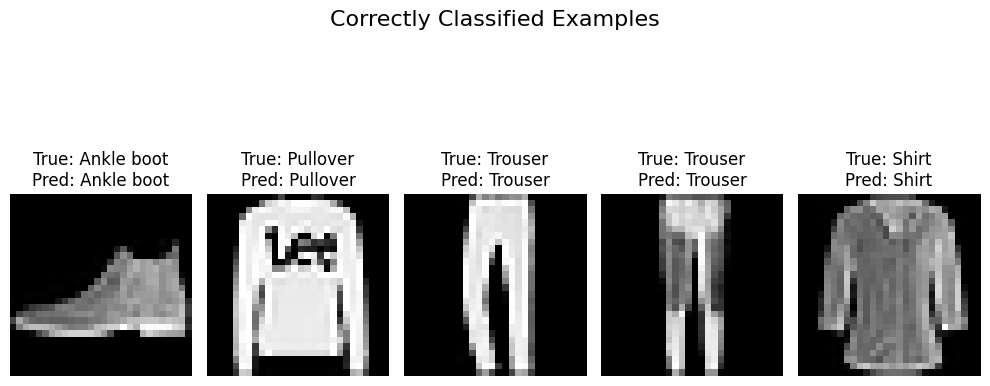

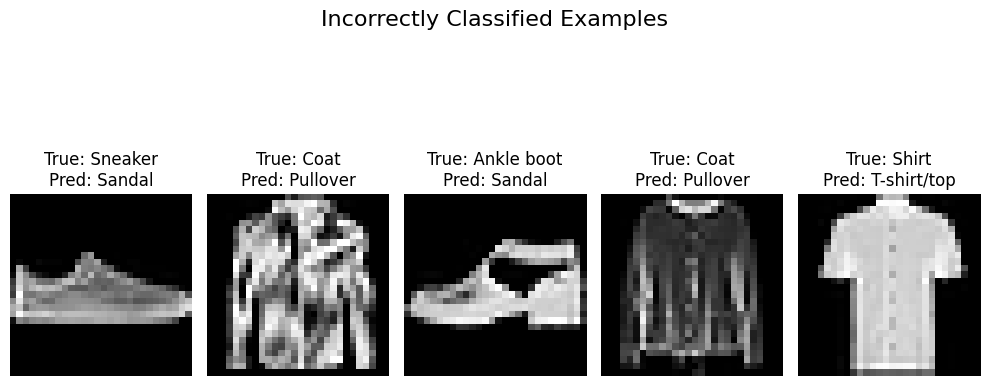

Visualized correct and incorrect predictions.


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data
# Make sure to set model to eval mode (already done in previous cell, but good practice)
model.eval()

# Store correct and incorrect predictions
correct_predictions = []
incorrect_predictions = []

# Fetch images and labels from the test loader without shuffling to ensure consistent access
# We'll use the original test_dataset for visualization to map index to images easily

# To make sure we get a good variety, we can iterate through the test_loader
# and collect predictions, then select from them.

almost_correct_predictions = [] # Store tuple of (image, true_label, predicted_label)

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs.data, 1)

        # Move tensors to CPU and convert to numpy for plotting
        images_np = images.cpu().numpy()
        labels_np = labels.cpu().numpy()
        predicted_np = predicted.cpu().numpy()

        for i in range(len(labels_np)):
            img = images_np[i].squeeze() # Remove channel dimension (1, 28, 28) -> (28, 28)
            true_label = labels_np[i]
            pred_label = predicted_np[i]

            if true_label == pred_label:
                if len(correct_predictions) < 5: # Collect up to 5 correct predictions
                    correct_predictions.append((img, true_label, pred_label))
            else:
                if len(incorrect_predictions) < 5: # Collect up to 5 incorrect predictions
                    incorrect_predictions.append((img, true_label, pred_label))

            # If we have enough samples, break early
            if len(correct_predictions) >=5 and len(incorrect_predictions) >= 5:
                break

        if len(correct_predictions) >=5 and len(incorrect_predictions) >= 5:
            break

# Map integer labels to Fashion-MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_predictions(predictions, title):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)
    for i, (img, true_label, pred_label) in enumerate(predictions):
        plt.subplot(1, len(predictions), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()

# Visualize correct predictions
plot_predictions(correct_predictions, 'Correctly Classified Examples')

# Visualize incorrect predictions
plot_predictions(incorrect_predictions, 'Incorrectly Classified Examples')

print("Visualized correct and incorrect predictions.")

## Final Task

### Subtask:
Summarize the end-to-end process of training an MLP on the Fashion-MNIST dataset, including the final test accuracy and observations from the visualizations.


## Summary:

### Q&A
The end-to-end process involved loading the Fashion-MNIST dataset, defining a Multi-Layer Perceptron (MLP) model, training it for 10 epochs, evaluating its performance, and visualizing predictions. The final test accuracy achieved by the MLP model was 88.78%. Observations from visualizations showed both correctly and incorrectly classified examples, providing qualitative insights into the model's performance.

### Data Analysis Key Findings
*   The Fashion-MNIST dataset was successfully loaded, and `DataLoader` objects were created with a batch size of 64. The training set comprised 938 batches, and the test set had 157 batches.
*   An MLP model, `FashionMNISTMLP`, was defined with an input layer suitable for flattened 28x28 images (784 features), two hidden layers with 256 and 128 neurons respectively, and an output layer for 10 classes, utilizing `ReLU` activation functions.
*   The model was trained for 10 epochs using `nn.CrossEntropyLoss` and the `Adam` optimizer with a learning rate of 0.001. The training loss decreased from approximately 0.5256 in Epoch 1 to 0.2256 in Epoch 10.
*   The model achieved a final accuracy of 88.78% on the 10,000 test images.
*   Visualization of predictions successfully identified and displayed five correctly and five incorrectly classified examples from the test set, along with their true and predicted labels.

### Insights or Next Steps
*   The MLP model achieved a respectable accuracy of 88.78% on the Fashion-MNIST dataset, indicating its effectiveness for this classification task.
*   Further improvements could be explored by hyperparameter tuning (e.g., learning rate, number of epochs, batch size), increasing model complexity (e.g., adding more layers or neurons), or transitioning to a Convolutional Neural Network (CNN) architecture, which is generally more suited for image classification tasks.
